In [7]:
from townsnet.models.region import Region

region = Region.from_pickle('data/region.pickle')

In [8]:
from townsnet.method.provision import Provision

prov = Provision(region=region)

In [9]:
import multiprocessing
from tqdm import tqdm

def calculate_provision(service_type):
  return (service_type, prov.calculate(service_type, self_supply=True))

pool = multiprocessing.Pool(8)
provs = {st:res for st, res in pool.map(calculate_provision, region.service_types)}

/home/vasilstar/townsnet/.venv/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


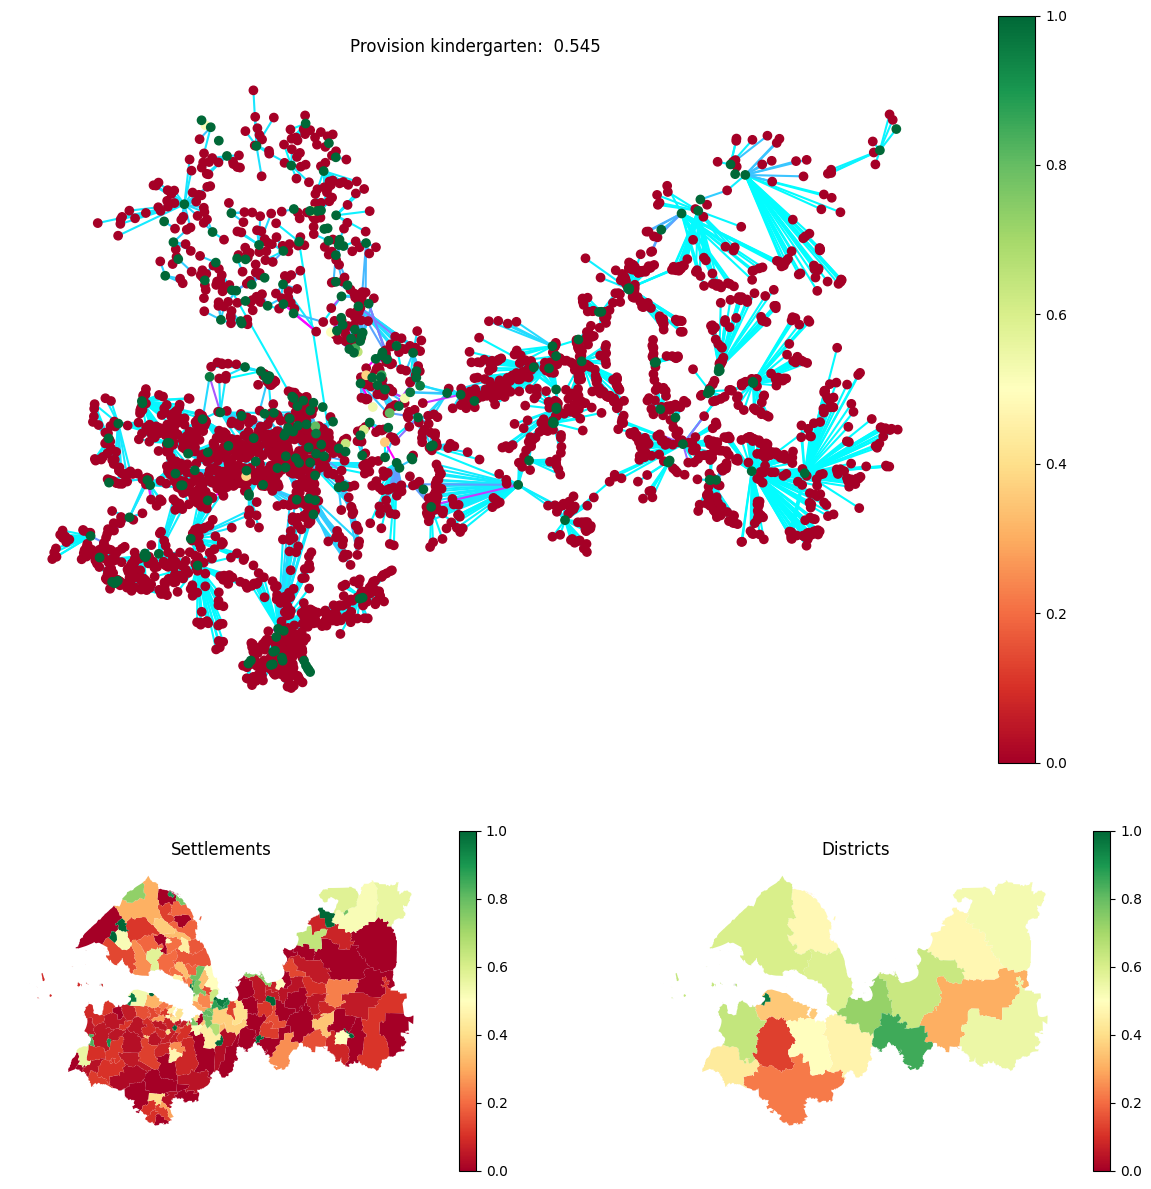

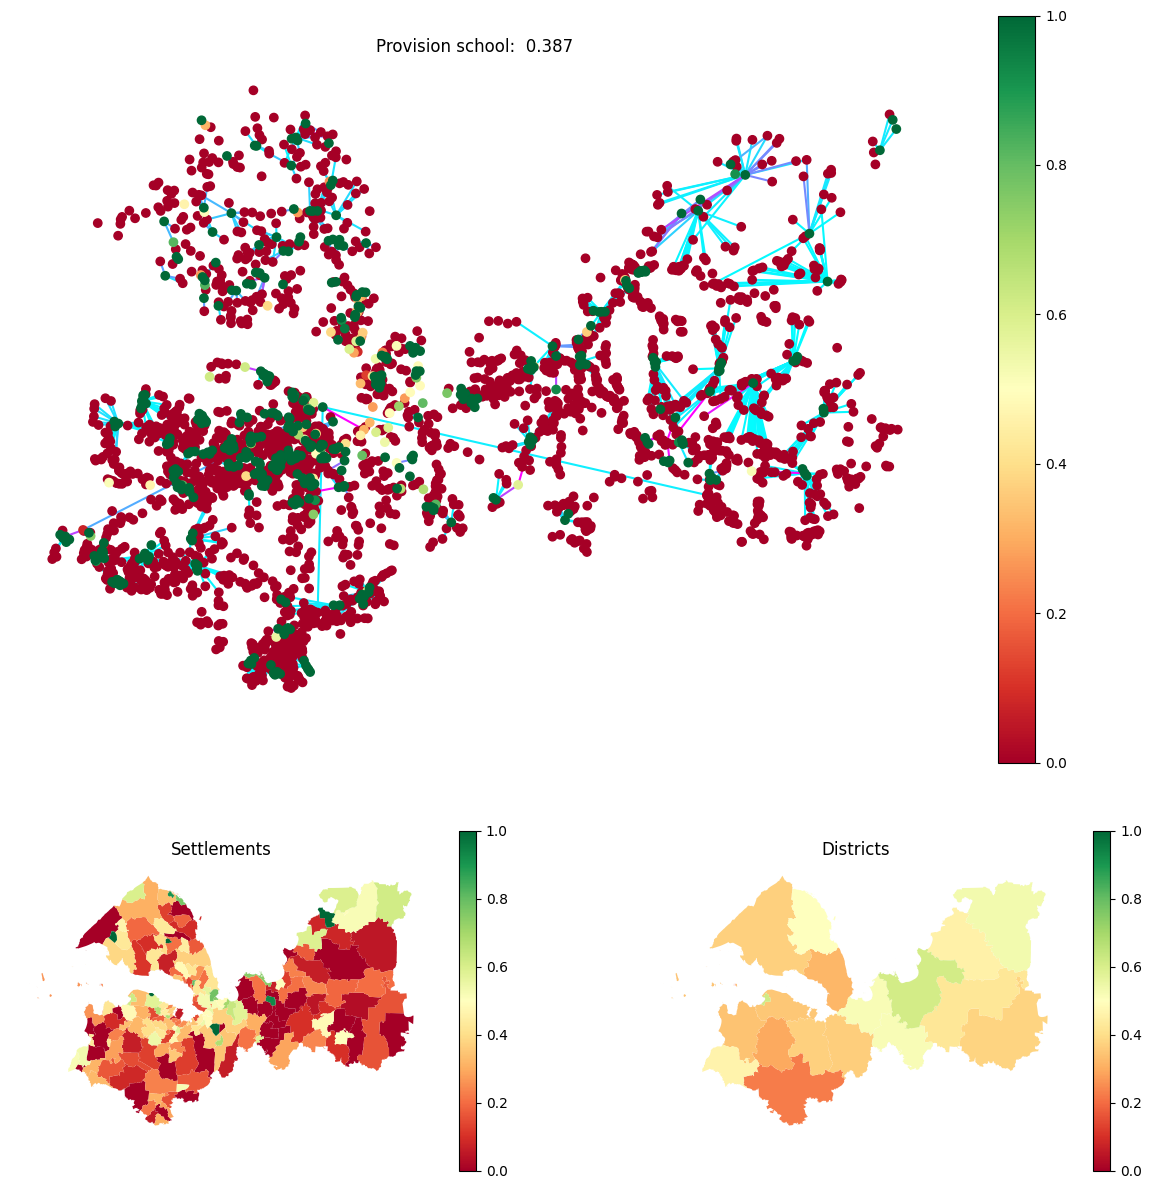

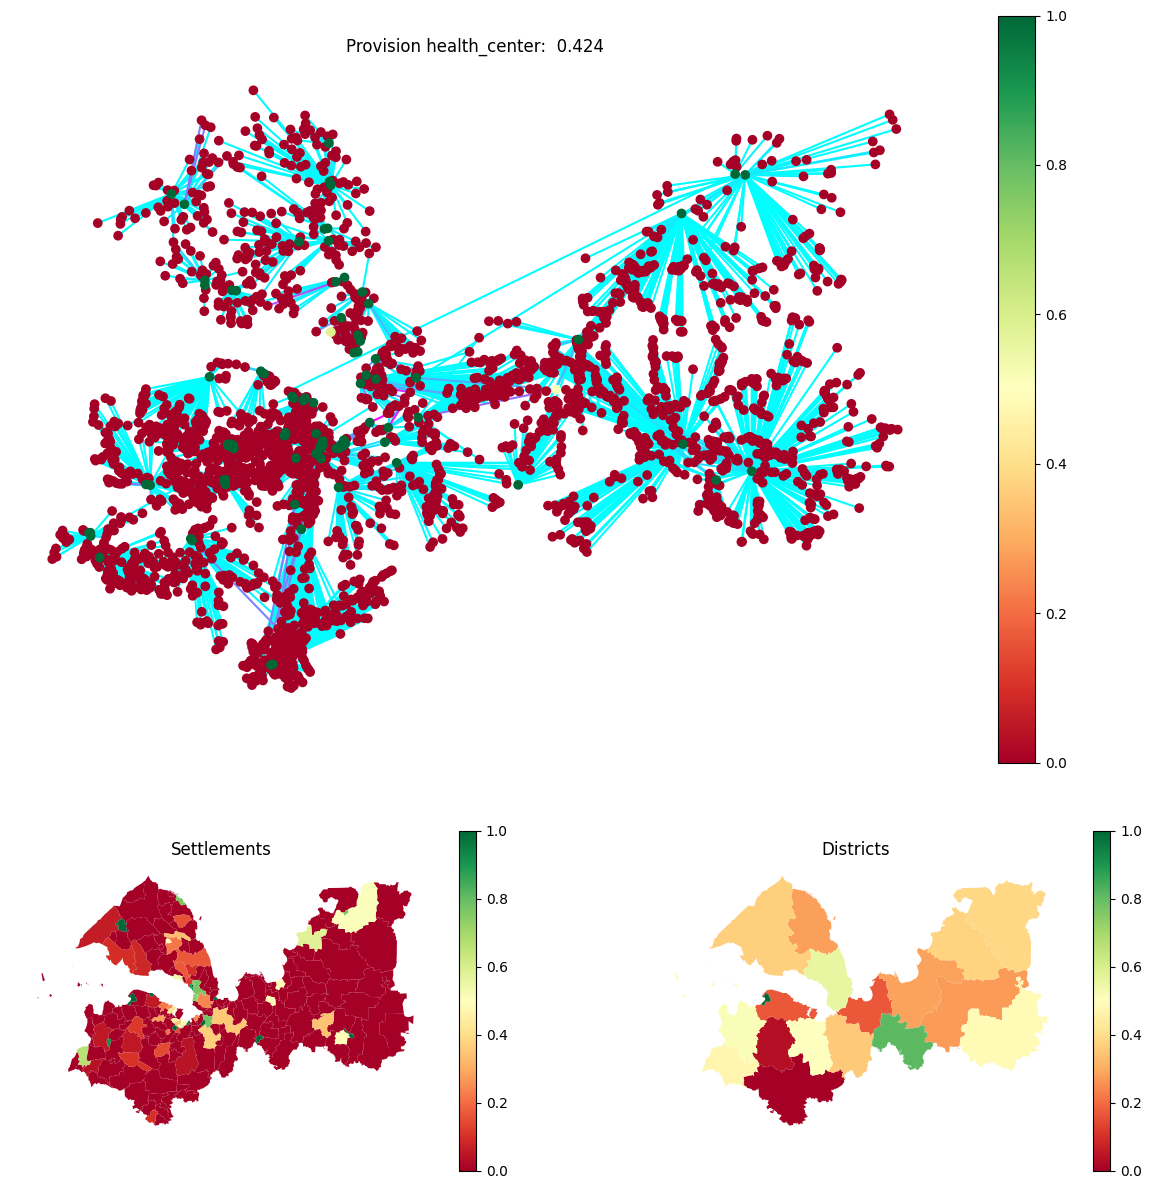

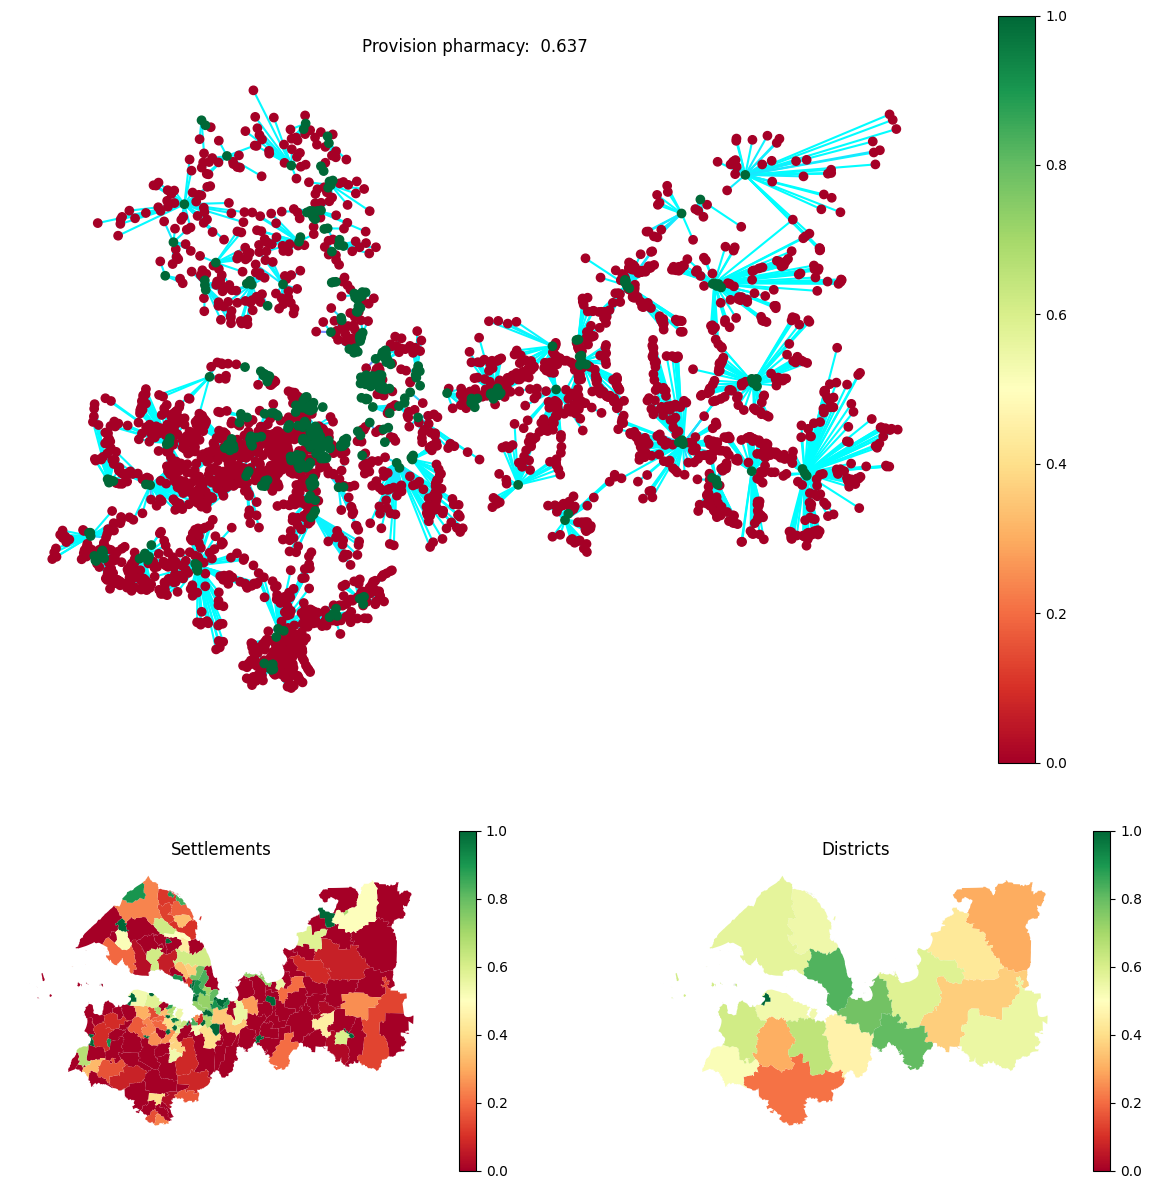

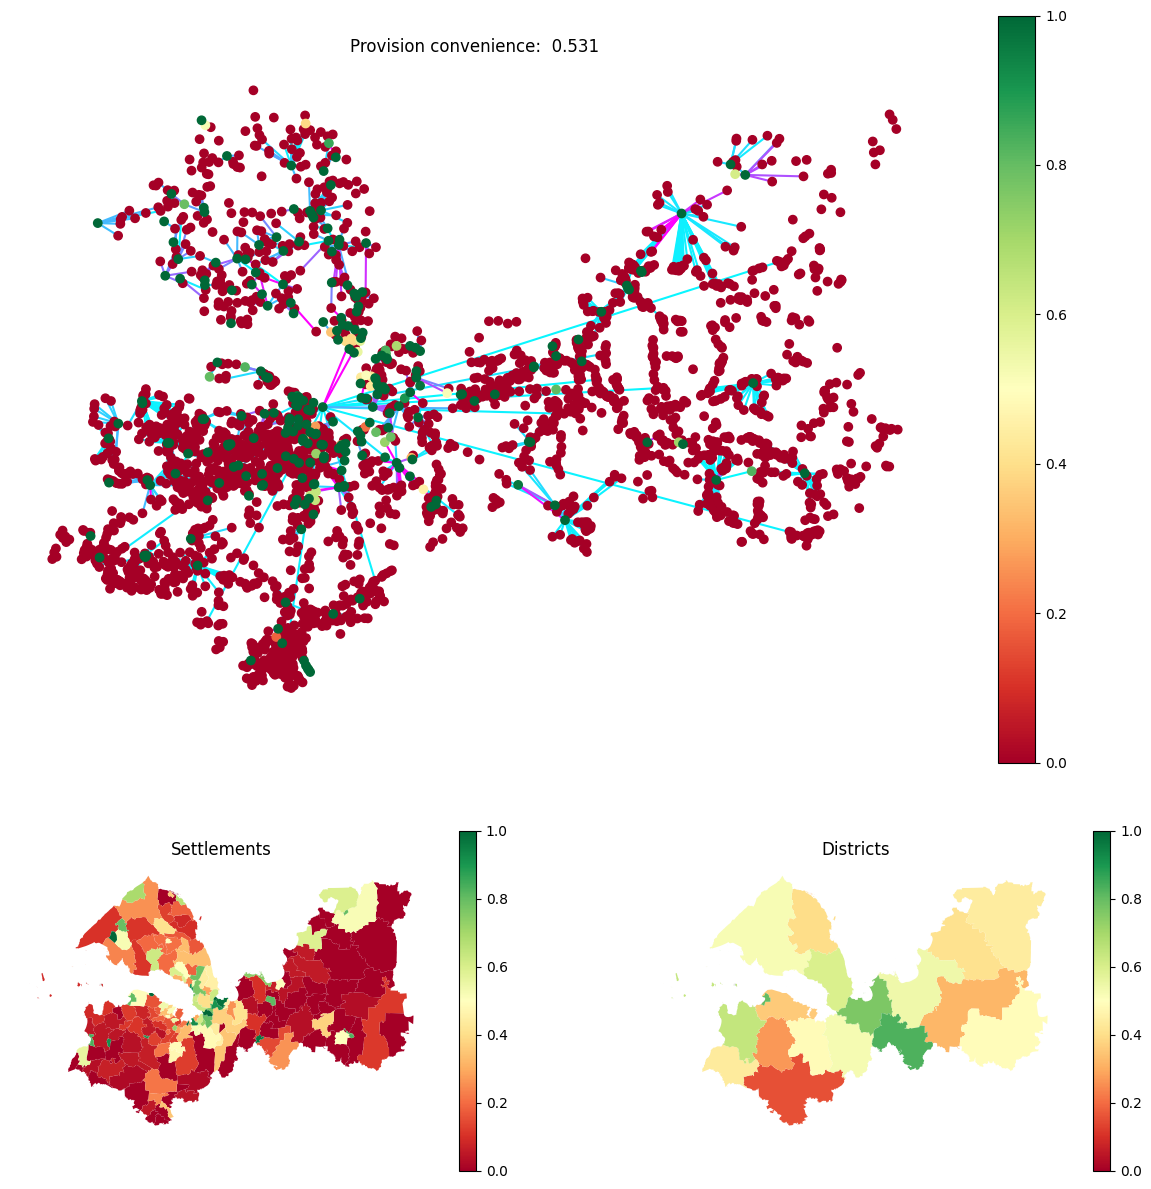

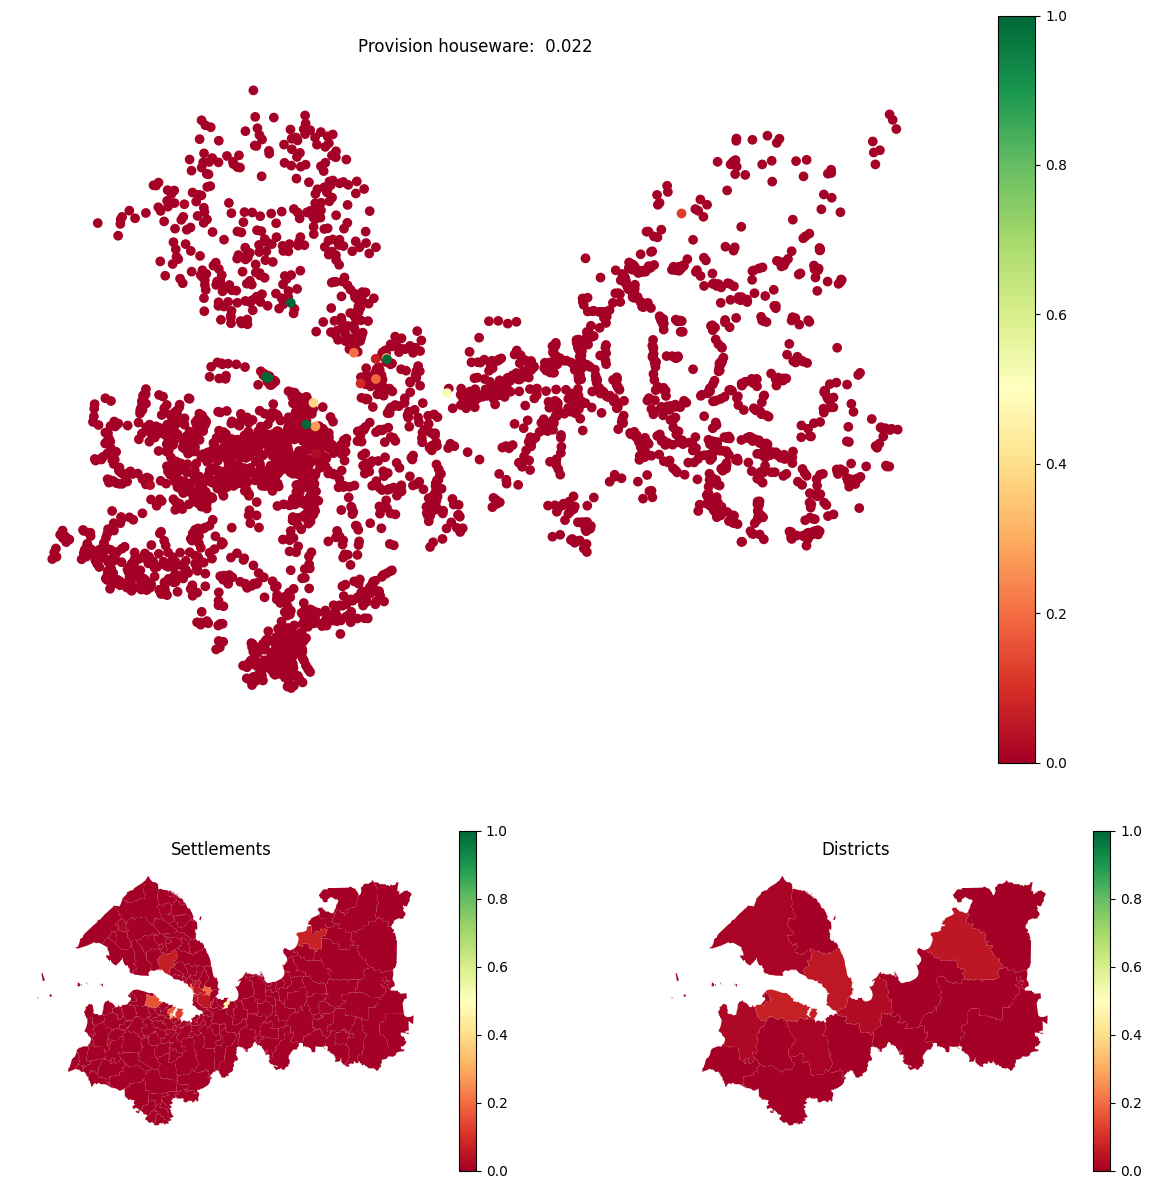

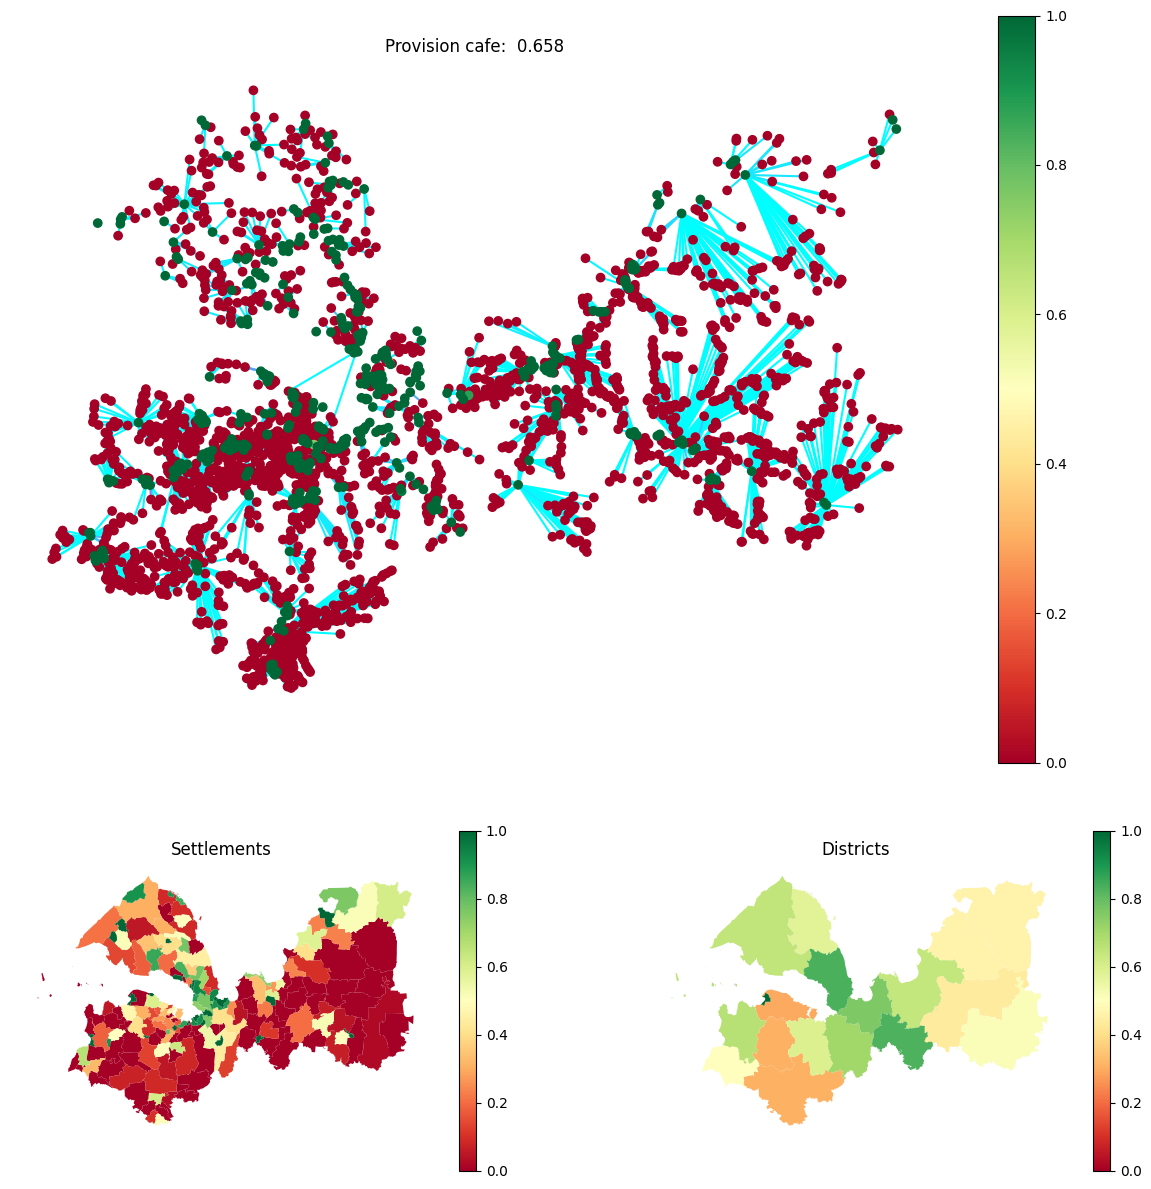

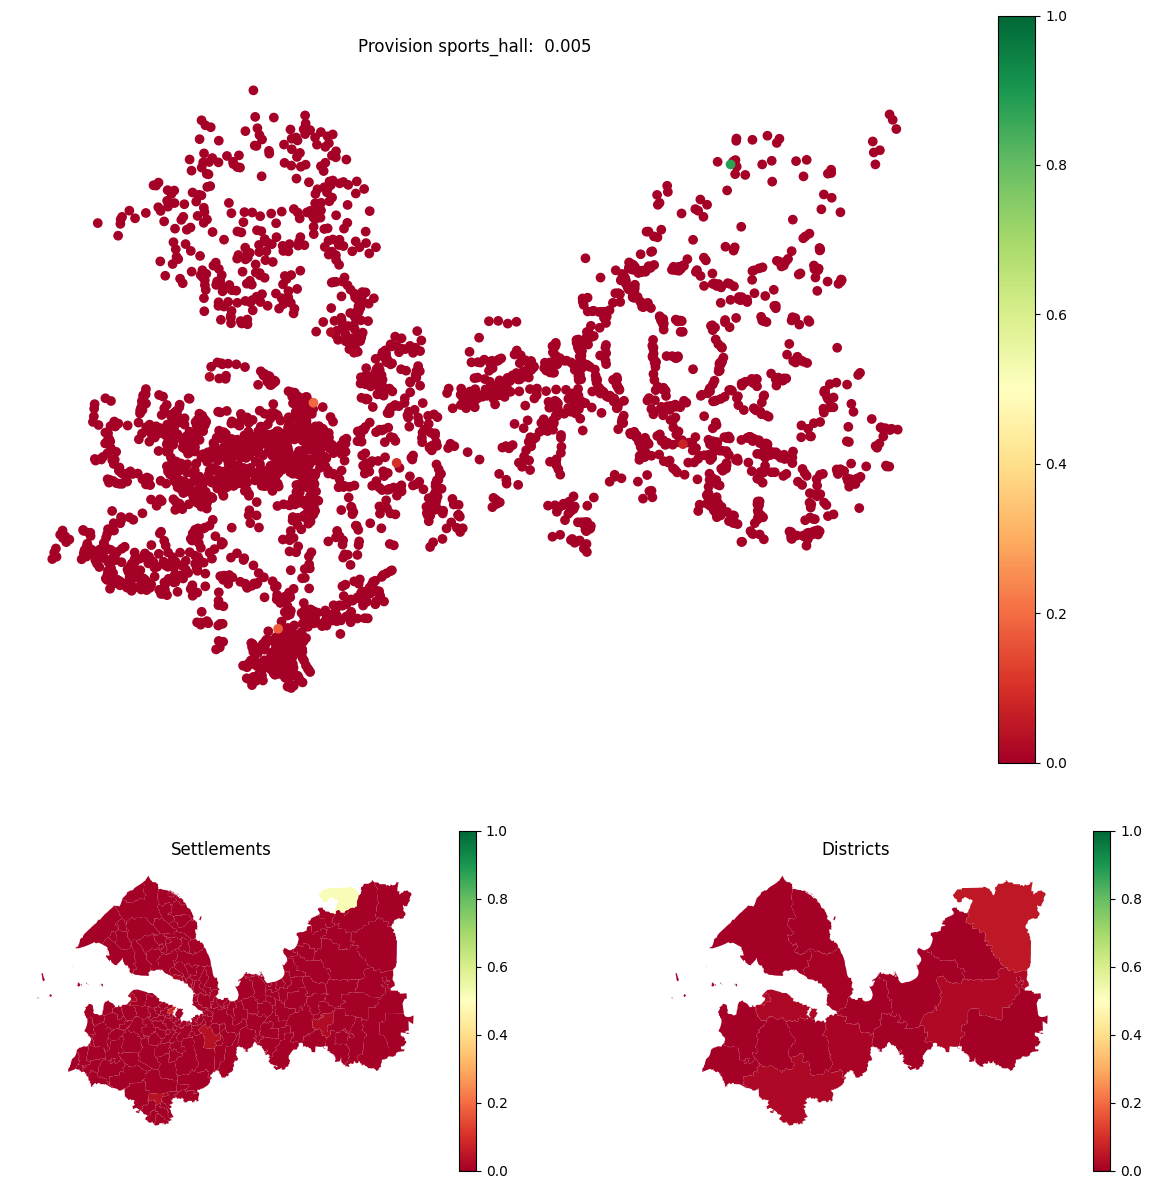

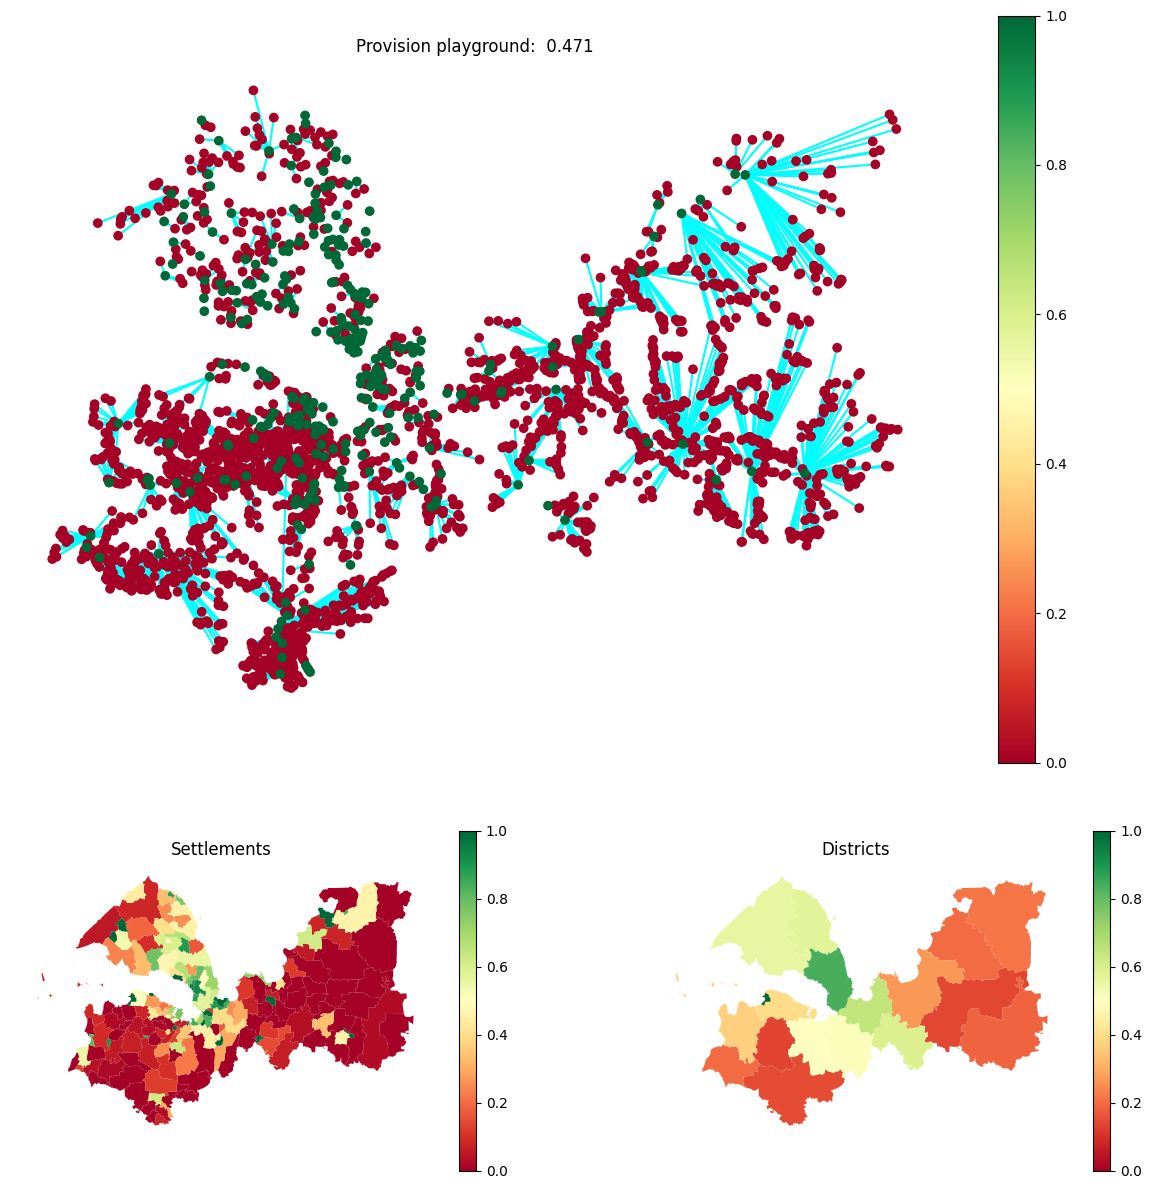

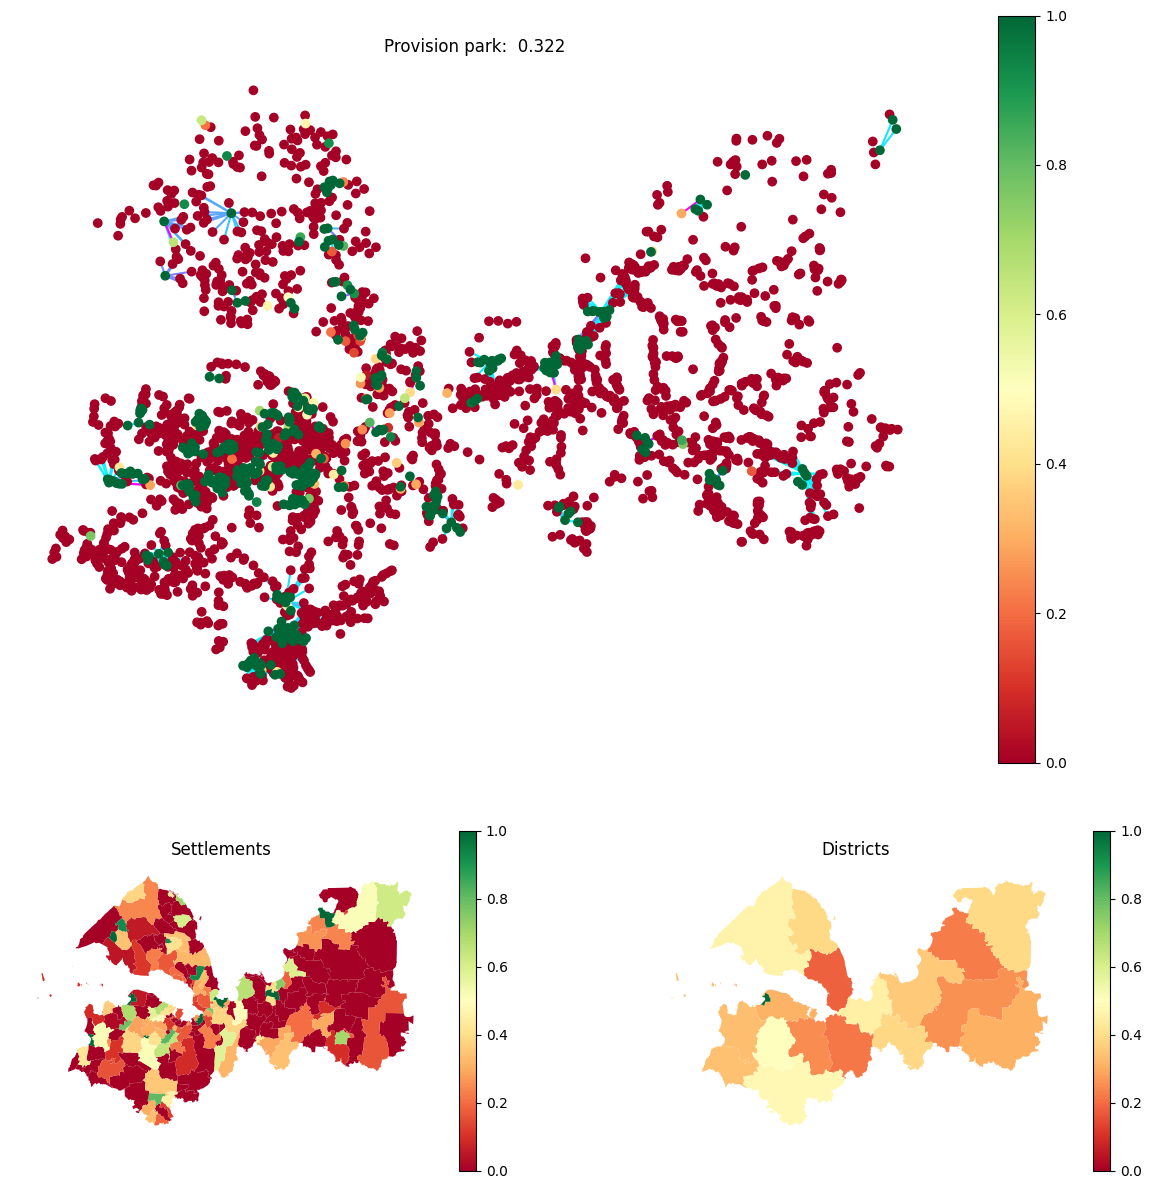

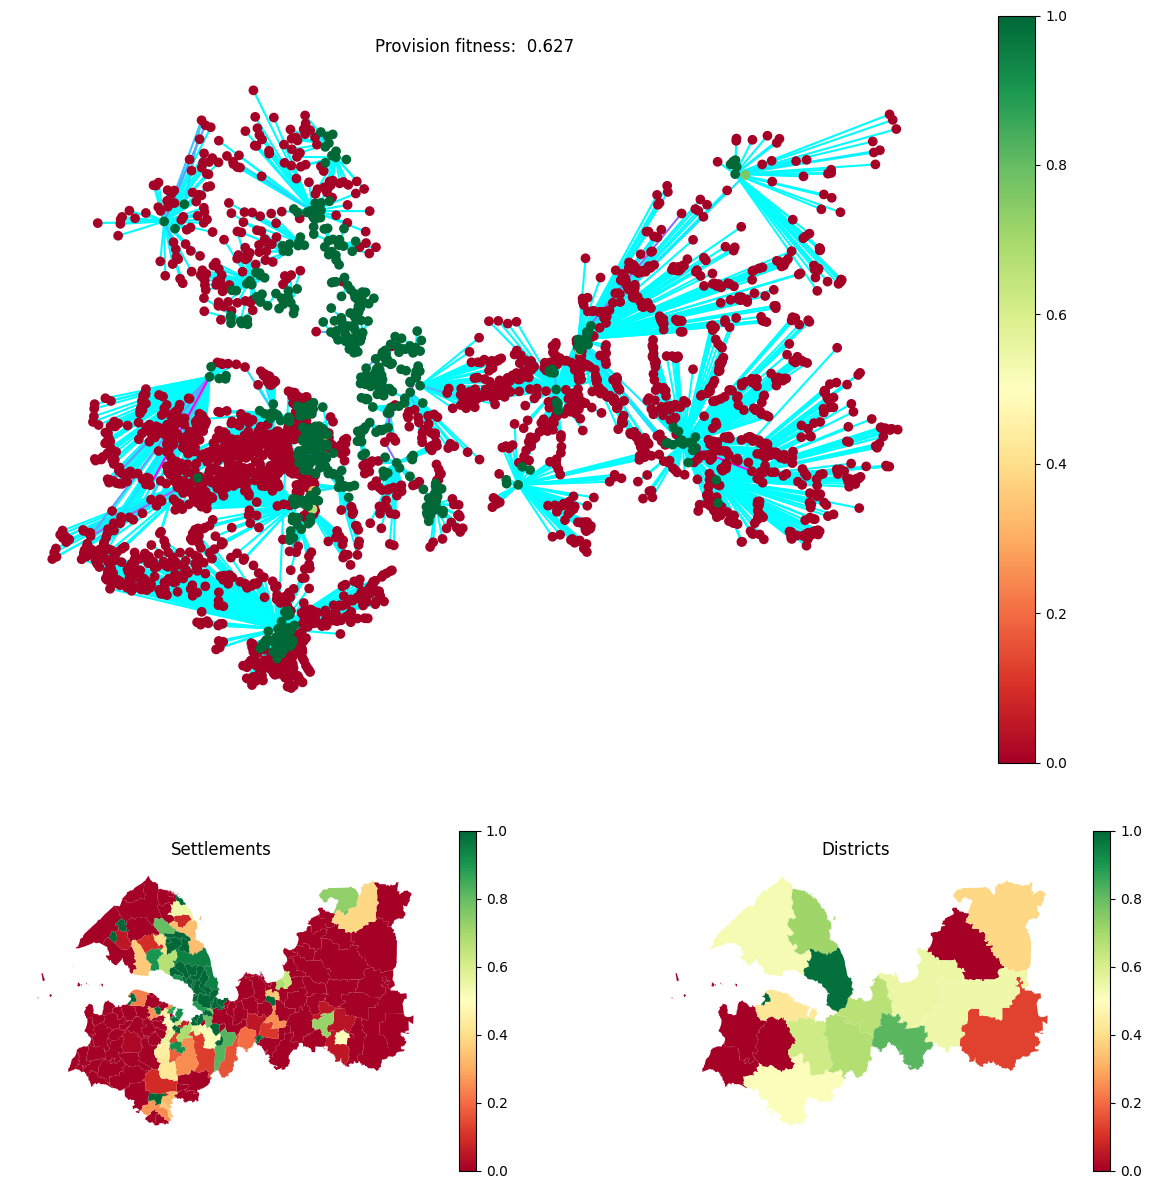

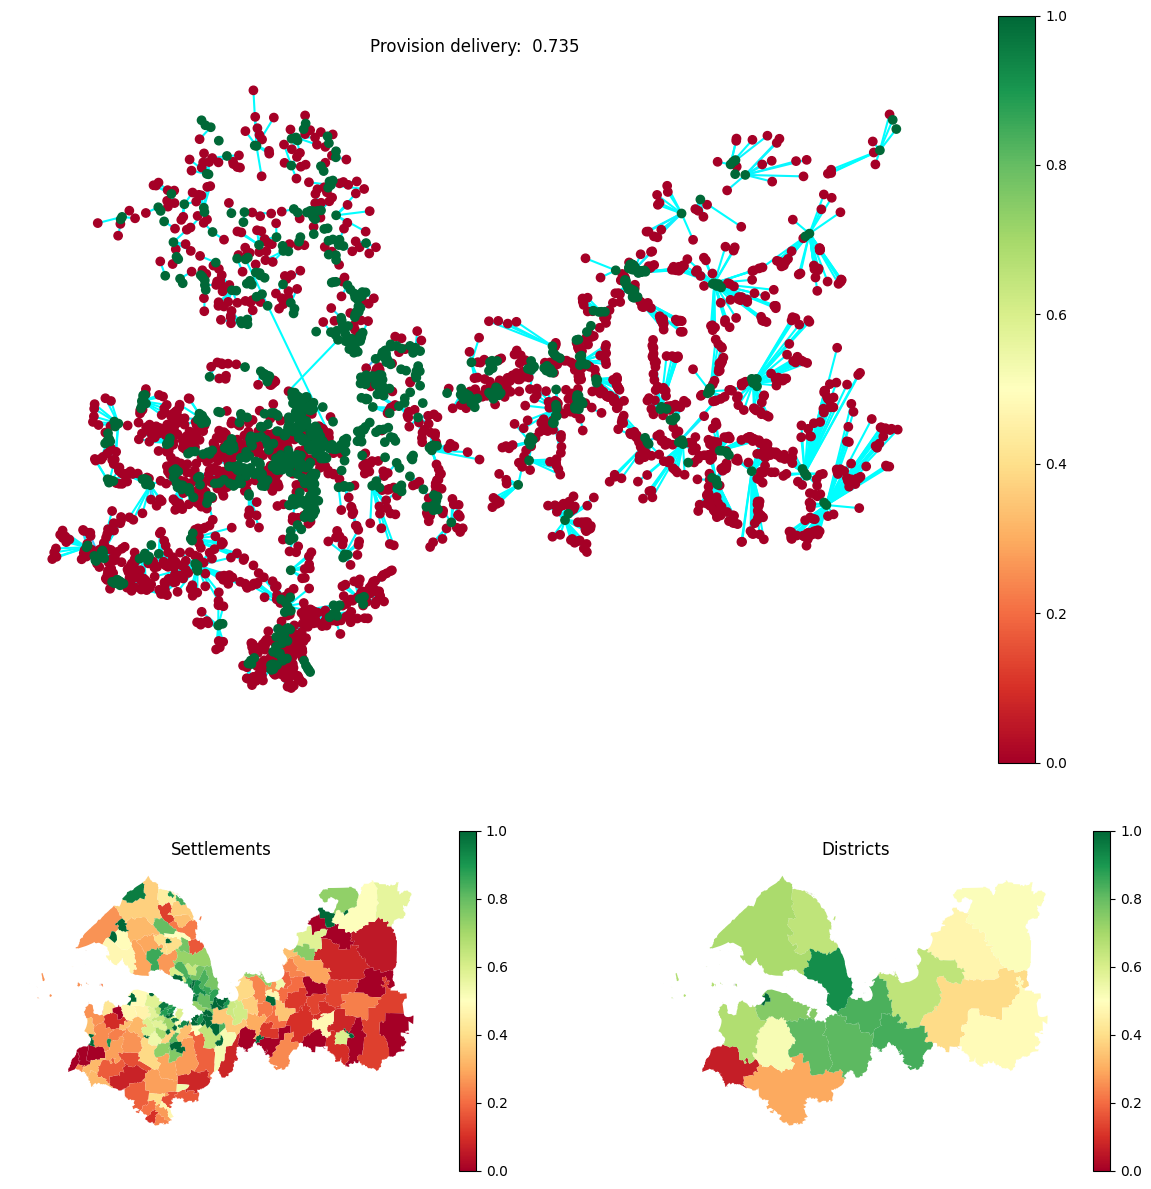

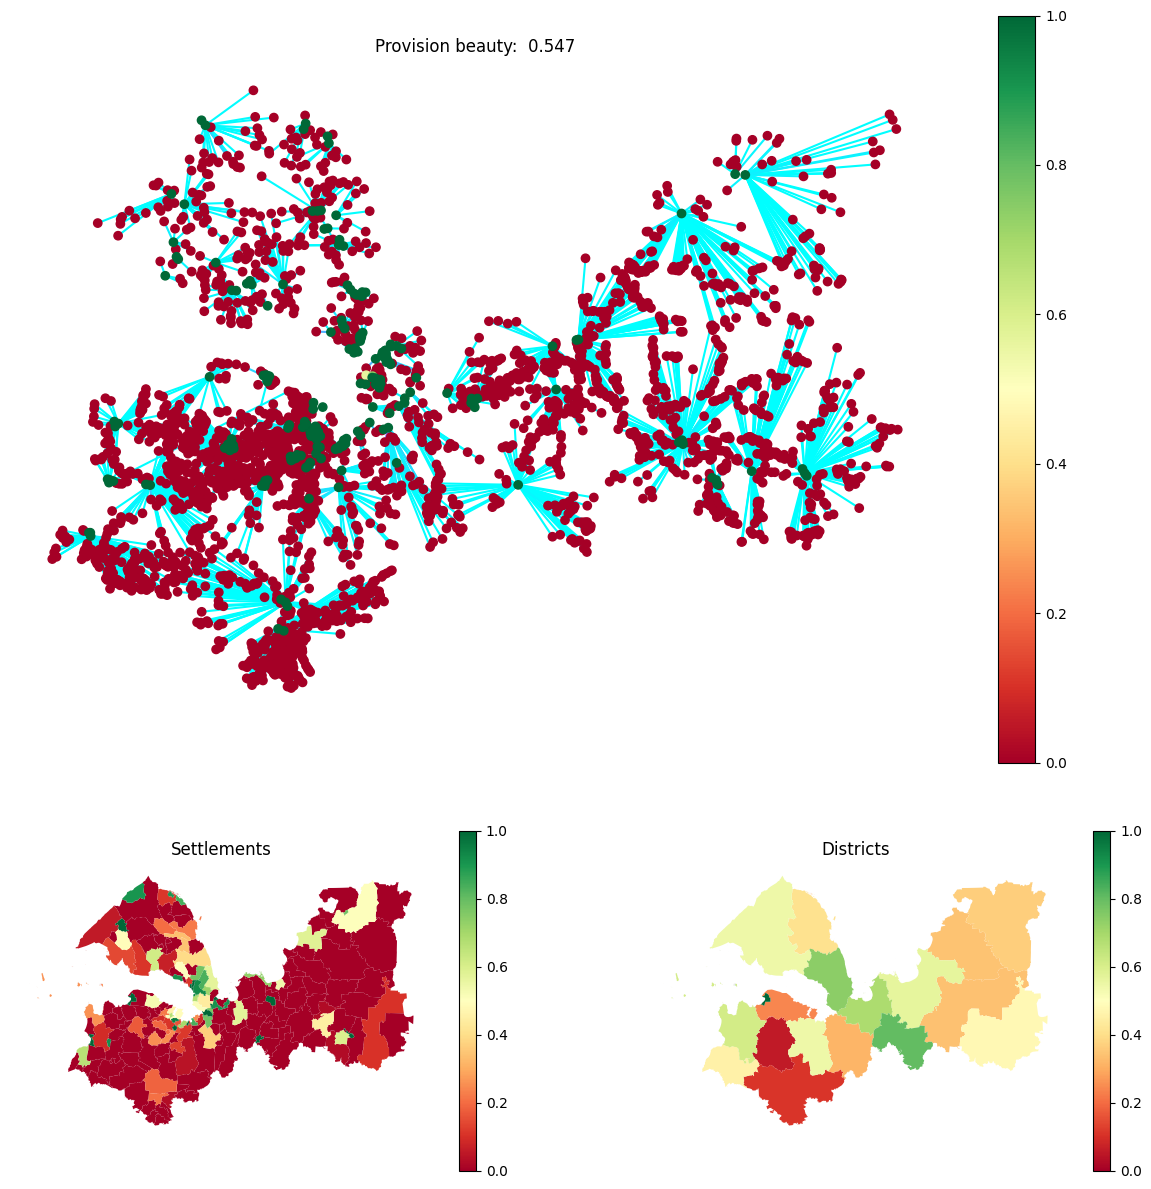

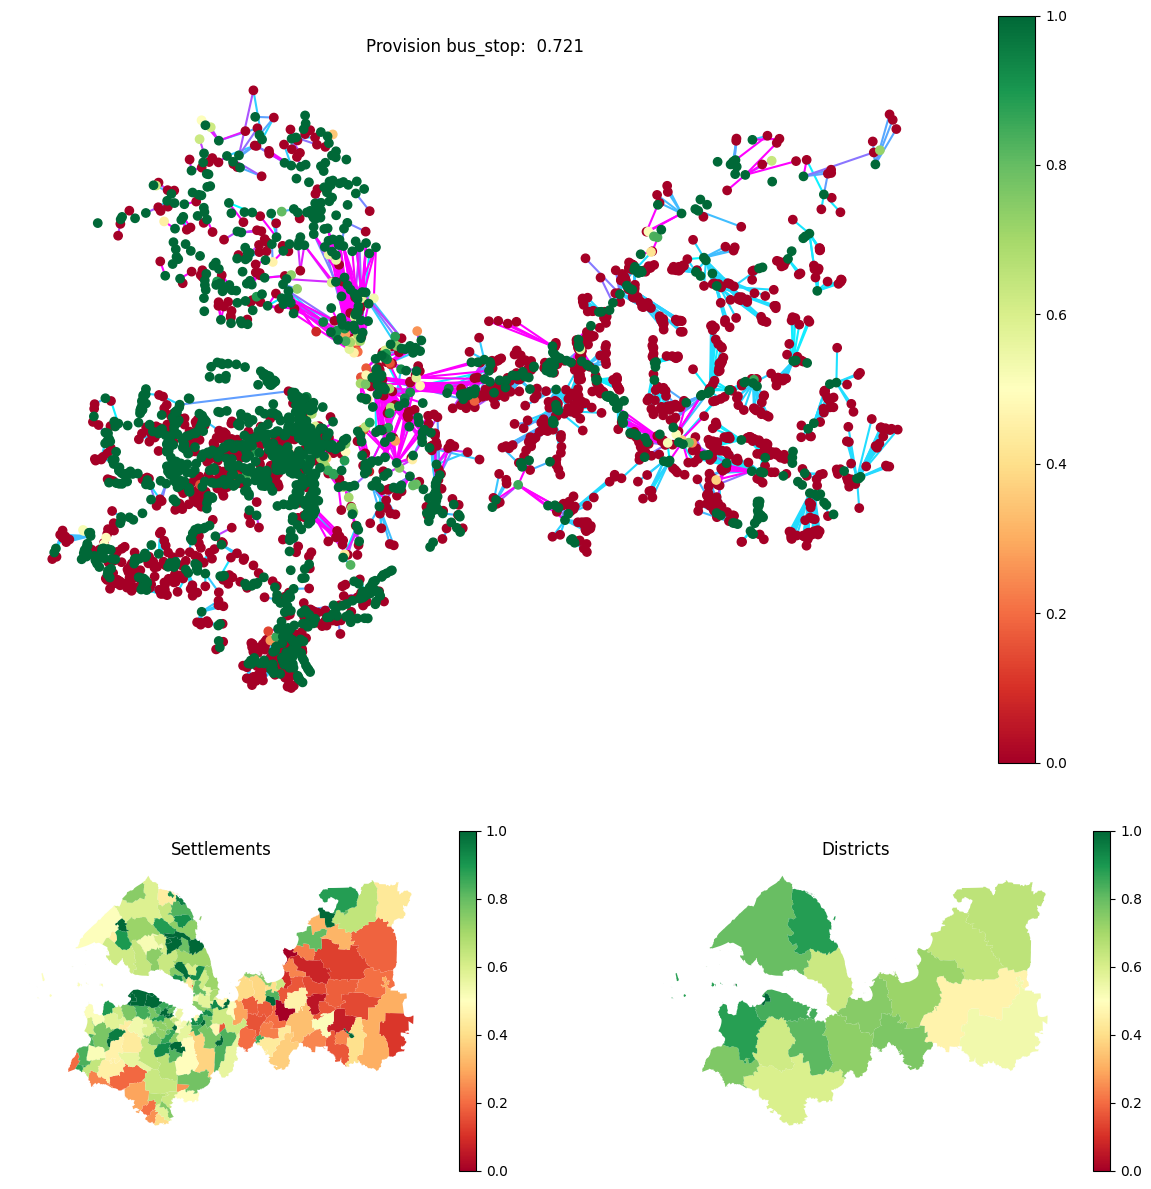

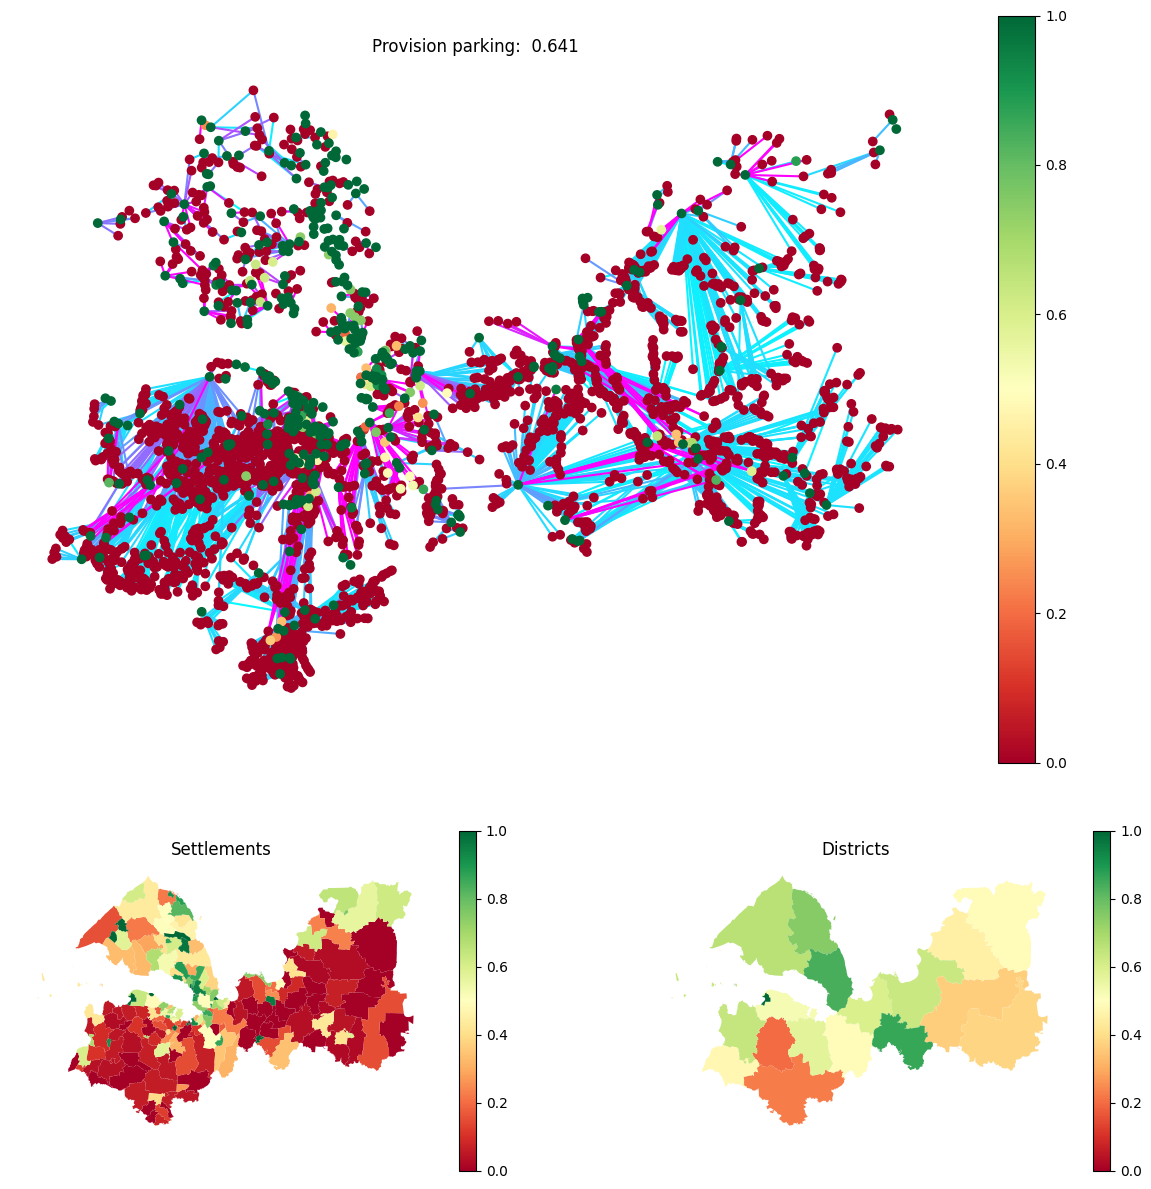

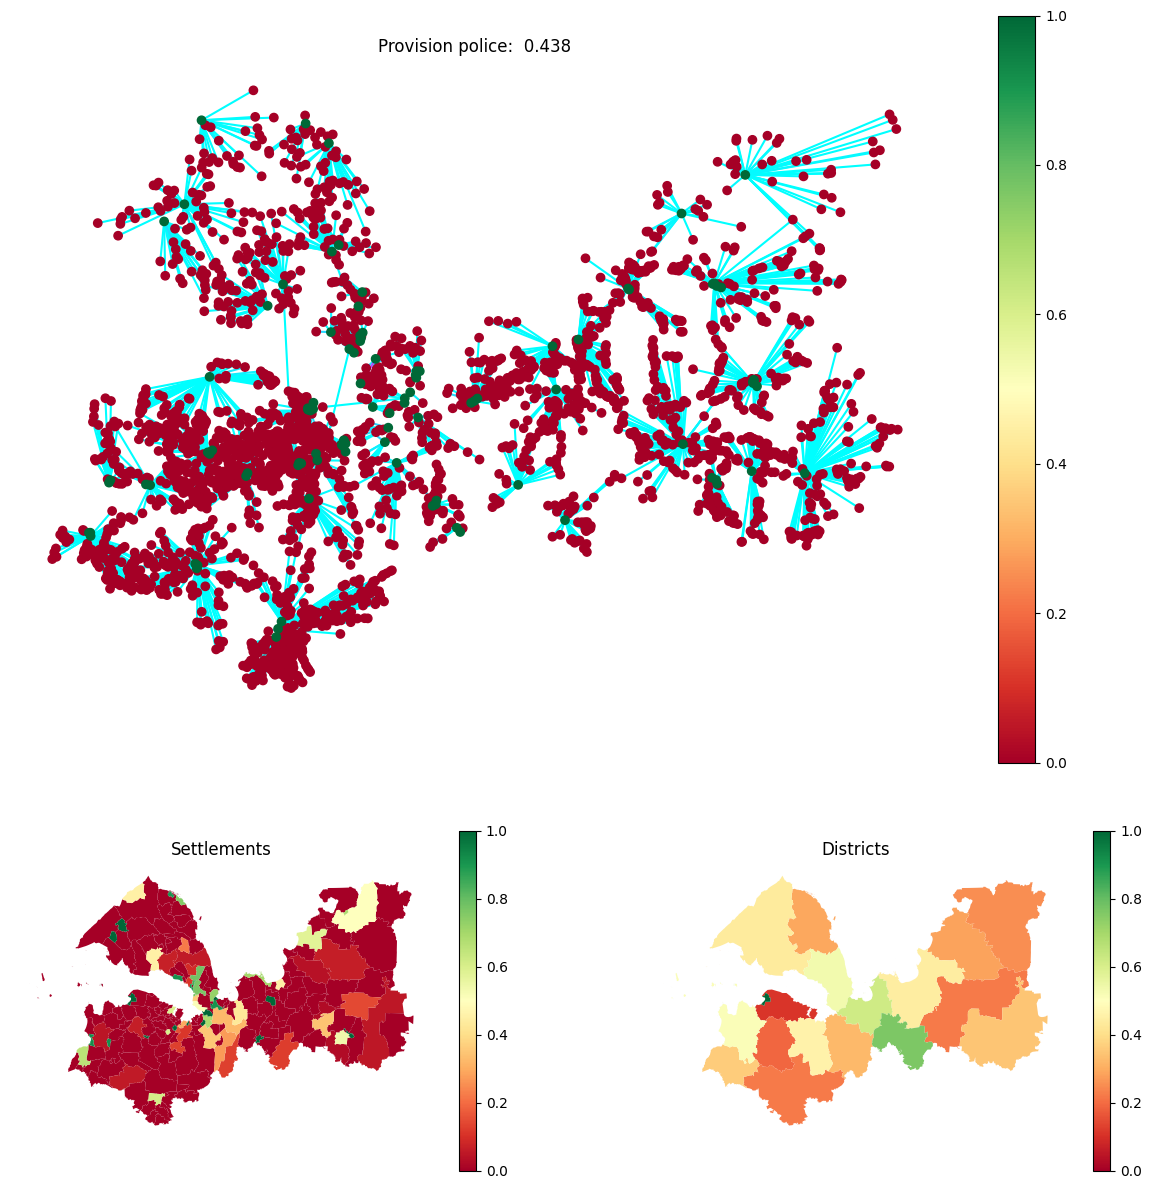

In [11]:
for service_type, prov_tuple in provs.items():
  districts_gdf, settlements_gdf, towns_gdf, links_gdf = prov_tuple
  prov.plot(service_type, districts_gdf, settlements_gdf, towns_gdf, links_gdf)

## Territory provision

In [44]:
import pandas as pd
from townsnet.method.provision import PLOT_KWARGS

territories_provs = {}

for territory in region.territories:
  dicts = []
  for service_type, prov_tuple in provs.items():
    _, _, towns_gdf, _ = prov_tuple
    prov_gdf, territory_dict = territory.context_provision(service_type, towns_gdf)
    dicts.append(territory_dict)
  territories_provs[territory.id]=pd.DataFrame(dicts)

/home/vasilstar/townsnet/townsnet/models/territory.py:17: RuntimeWarning: invalid value encountered in double_scalars
  result['provision'] = result['demand_within'] / result['demand']
/home/vasilstar/townsnet/townsnet/models/territory.py:17: RuntimeWarning: invalid value encountered in double_scalars
  result['provision'] = result['demand_within'] / result['demand']
/home/vasilstar/townsnet/townsnet/models/territory.py:17: RuntimeWarning: invalid value encountered in double_scalars
  result['provision'] = result['demand_within'] / result['demand']
/home/vasilstar/townsnet/townsnet/models/territory.py:17: RuntimeWarning: invalid value encountered in double_scalars
  result['provision'] = result['demand_within'] / result['demand']
/home/vasilstar/townsnet/townsnet/models/territory.py:17: RuntimeWarning: invalid value encountered in double_scalars
  result['provision'] = result['demand_within'] / result['demand']
/home/vasilstar/townsnet/townsnet/models/territory.py:17: RuntimeWarning: i

In [45]:
from townsnet.models.service_type import ServiceCategory

for territory_id, territory_prov in territories_provs.items():
  territory_prov.set_index('service_type', inplace=True, drop=True)
  territory_prov['infrastructure'] = territory_prov.apply(lambda s : region[s.name].infrastructure.value, axis=1)
  territory_prov['weight'] = territory_prov.apply(lambda s : region[s.name].weight if s.provision > 0.9 else 0, axis=1)

In [49]:
territories_criterias = {}

for territory_id, territory_prov in territories_provs.items():
  territories_criterias[territory_id] = territory_prov.groupby('infrastructure').agg({'weight': 'sum'})

In [56]:
for territory_id, territory_criterias in territories_criterias.items():
  territory = region.get_territory(territory_id)
  print(f"{territory.name}, базовые, {territory_criterias['weight'].sum() : .1f}")

Аэродром Лодейнопольское поселение, базовые,  2.0
Проект Шлиссельбург, базовые,  0.6
Аэродром Сиверский, базовые,  0.3
Проект Светогорское поселение, базовые,  0.6
